In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [11]:
# View all of the classes that automap found
classes = Base.classes.keys()
classes

['measurement', 'station']

In [12]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement 

In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [14]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
recent_date

'2017-08-23'

In [20]:
# one_year_ago = recent_date - dt.timedelta(days=365)

In [ ]:
# precipitation_data = session.query(Measurement.date, func.avg(Measurement.prcp)).\
#                     filter(Measurement.date >= one_year_ago).\
#                     order_by(Measurement.date).all()
# precipitation_data

<function matplotlib.pyplot.show(*args, **kw)>

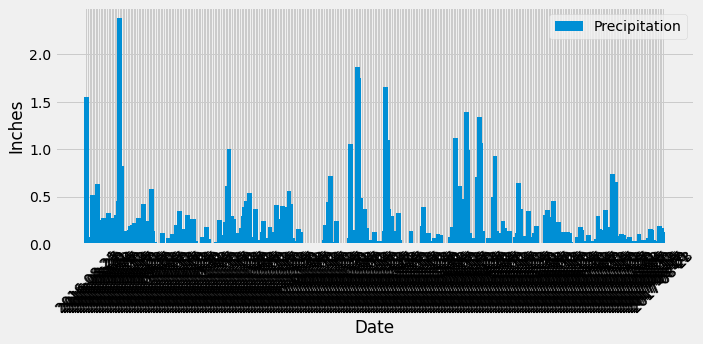

In [37]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date
# Calculate the date one year from the last date in data set.
one_year_ago = dt.datetime.strptime(recent_date, "%Y-%m-%d") - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, func.avg(Measurement.prcp))\
                    .filter(Measurement.date >= one_year_ago)\
                    .group_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation_data, columns=["Date", "Precipitation"])

# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values(by="Date")
precipitation_df.head()

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10, 5))
plt.bar(precipitation_df['Date'], precipitation_df['Precipitation'], label='Precipitation', width=3)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig("../Precipitation.png")
plt.show

In [46]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()


,Precipitation
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


# Exploratory Station Analysis

In [47]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.id).count()

9

In [49]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stations = session.query(Measurement.station, func.count(Measurement.station))\
        .group_by(Measurement.station)\
        .order_by(func.count(Measurement.station).desc()).all()
stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [51]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_temp = stations[0][0]
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))\
    .filter(Measurement.station == station_temp).all()

[(54.0, 85.0, 71.66378066378067)]

<function matplotlib.pyplot.show(*args, **kw)>

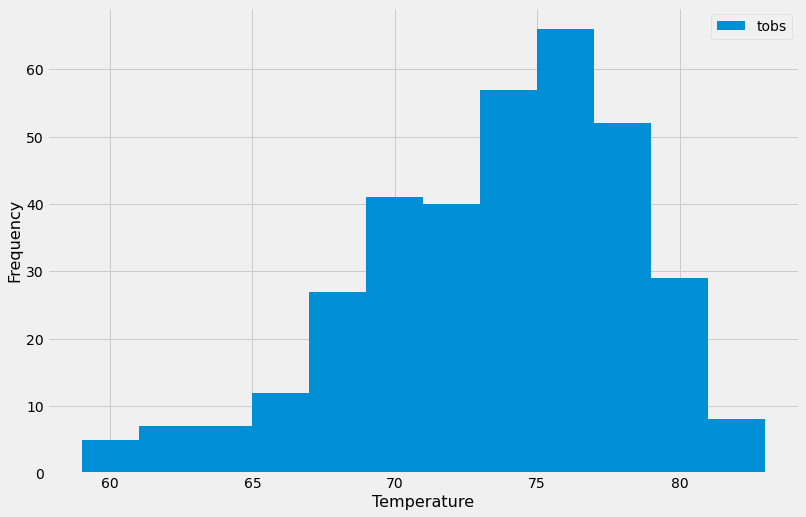

In [56]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_obv = session.query(Measurement.station, Measurement.tobs)\
                .filter(Measurement.station == station_temp)\
                .filter(Measurement.date >= one_year_ago).all()

temp_df = pd.DataFrame(temperature_obv)
temp_df.set_index("station", inplace=True)
temp_df.head()

temp_df.plot.hist(by='station', bins=12, figsize=(12,8))
plt.xlabel("Temperature", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.legend()
plt.savefig("../StationTemps.png")
plt.show

# Close Session

In [57]:
# Close Session
session.close()